### Задача 1

В поле ответа впишите одно число. Нецелые числа следует округлить до 8 знаков после запятой.
Задача 1
Даны значения зарплат из выборки выпускников:
100, 80, 75, 77, 89, 33, 45, 25, 65, 17, 30, 230, 24, 57, 55, 70, 75, 65, 84, 90, 150
 
Используя только встроенные питоновские функции и структуры данных (т.е. без библиотек numpy, pandas и др.), посчитайте (несмещённое) среднее квадратичное отклонение для данной выборки.


In [7]:
from statistics import mean
import math as m
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

salaries = [100, 80, 75, 77, 89, 33, 45, 25, 65, 17, 30, 230, 24, 57, 55, 70, 75, 65, 84, 90, 150]

# СКО 
# Вручную, не смещенная
sum_of_sqared_deviations = sum(pow(salaries[n]-mean(salaries), 2) for n in range(len(salaries)))
std = m.sqrt(pow(len(salaries)-1, -1)*sum_of_sqared_deviations)
print(f'СКО: {std}')





СКО: 47.34795213553139


### Задача 2

Найдите число выбросов в выборке из задачи 1. Для определения выбросов используйте методику как при построении “усов” в boxplot, однако, как и в задаче 1, пользоваться можно только встроенными функциями и структурами данных.


(-13.5, 142.5)

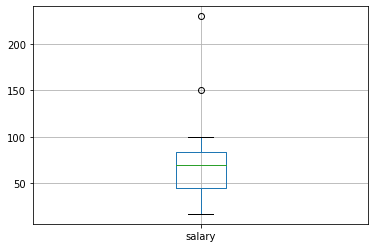

In [12]:
df = pd.DataFrame(salaries, columns=['salary'])
q1 = df['salary'].quantile([0.25])
q3 = df['salary'].quantile([0.75])
iqr = q3[0.75]-q1[0.25]
df[['salary']].boxplot()

boxplot_range = (q1[0.25] - 1.5 * iqr, q3[0.75] + 1.5 * iqr)
boxplot_range

In [13]:
# Выбросы
outliers = df.loc[(df['salary'] < boxplot_range[0]) | (df['salary'] > boxplot_range[1])]

outliers

,salary
11,230
20,150


### Задача 3
В университет на факультет A поступило 100 человек, на факультет B - 90 человек и на факультет C - 45 человек. Вероятность того, что студент с факультета A сдаст первую сессию, равна 0.6. Для студента с факультета B эта вероятность равна 0.7, а для студента с факультета C - 0.8. Случайным образом выбирается студент, сдавший первую сессию. Какое событие наиболее вероятно:
студент учится на факультете A,
студент учится на факультете B,
студент учится на факультете C?
Замечание: да, эта задача не на тему статистики, но тема важная, и её стоит иногда освежать в памяти.


Пусть событие S - сдача сессии (чтобы не путать с буквами факультетов). По условию задачи вероятности сдачи сессии студентами разных факультетов равны: $$ P(S|A)=0.8$$ $$ P(S|B)=0.7$$ $$ P(S|C)=0.9$$ Вероятность попасть на факультет равна: $$ P(A)=0.25$$ $$ P(B)=0.25$$ $$ P(C)=0.5$$ Суть задачи состоит в том, чтобы найти вероятности: а) $P(A|S)-?$; б) $P(B|S)-?$; в) $P(C|S)-?$

Найдем вероятность сдачи сессии по формуле полной вероятности: $P(S)=P(S|A)\cdot P(A)+P(S|B)\cdot P(B)+P(S|C)\cdot P(C)=0.8\cdot 0.25 + 0.7\cdot 0.25 + 0.9\cdot 0.5=0.825$
Далее воспользуемся формулой Байеса:
а) $$P(A|S)=\frac{P(S|A)\cdot P(A)}{P(S)}=\frac{0.8\cdot 0.25}{0.825}=0.24$$
б) $$P(B|S)=\frac{P(S|B)\cdot P(B)}{P(S)}=\frac{0.7\cdot 0.25}{0.825}=0.21$$
в) $$P(C|S)=\frac{P(S|C)\cdot P(C)}{P(S)}=\frac{0.9\cdot 0.5}{0.825}=0.55$$